# NB4. Models of Networks

## A. Models of Networks.

Consider the following [Graph Generators](https://networkx.github.io/documentation/stable/reference/generators.html):

**Random Network Model**: The function ```erdos_renyi_graph(n,p)``` returns a $G_n,p$ random graph with the following parameters:
* n - The number of nodes.
* p - Probability fo edge creation.

**Small World Model ** : The function ```watts_strogatz_graph(n,k,p)``` returns a small-world graph with the following parameters:
* n - The number of nodes.
* k - Each node is joined with its k nearest neighbors in a ring topology.
* p - The probability of rewiring each edge.

### Task 1

Simulate different networks using the Erdos-Renyi Model considering the following parameters:

(a) N = 100, p = 0.20

(b) N = 100, p = 0.40

(c) N = 100, p = 0.60

(d) N = 100, p = 0.80

For each network plot its degree distribution. Additionally, make a comparative table including:
* Number of links.
* Expected number of links using the equation:
$$ \langle L \rangle = p \frac{N(N-1)}{2}$$
* Average degree.
* Expected average degrees using the equation:
$$\langle k \rangle = p(N-1)$$
* Density.
* Expected density using the equation:
$$\langle d \rangle = p$$
* Average Shortest Path.
* Expected Average Shortest Path using the equation:
$$\langle l \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)}$$

In [1]:
import networkx as nx
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd

plt.rcParams["figure.figsize"] = (10,10)

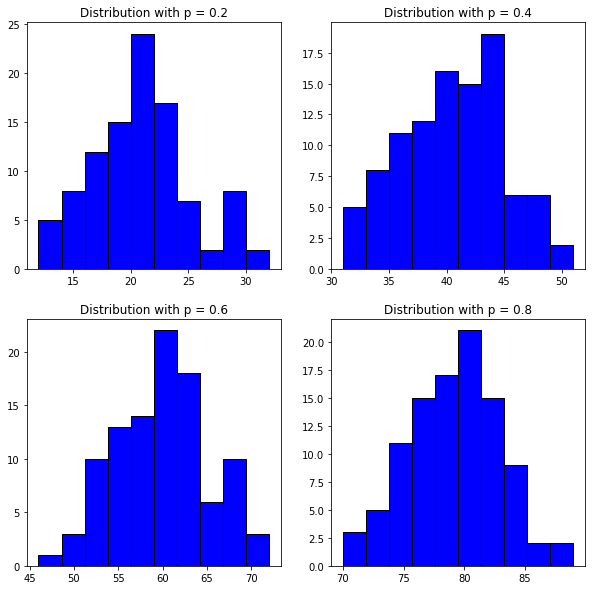

In [2]:
n_list = [100] * 4
p_list = [.2, .4, .6, .8]

i = 0

dict_to_frame = dict()

for n, p in zip(n_list, p_list):
    
    ax = plt.subplot(2, 2, i + 1)
    
    random_model = nx.generators.random_graphs.erdos_renyi_graph(n = n, p = p) 
    
    #getting the degrees of each node
    values = [dgr[1] for dgr in random_model.degree()]
    #counting the degrees
    count = Counter(values)
    
    deg, cnt = zip(*count.items())
    
    ax.hist(x = values, edgecolor = 'black', color = 'blue')
    ax.set_title('Distribution with p = %.1f' %p)
    
    i += 1

    avg_d = sum(values)/len(values)
        
    dict_to_frame['P = {}'.format(p)] = {'# links': random_model.number_of_edges(), 'L Exp': p * (n * (n-1))/2,
                                        'average degree': avg_d , 'Avg Exp': p * (n-1),
                                        'Density': nx.classes.function.density(random_model), 'Den Exp': p,
                                    'Avg shortest path': nx.algorithms.shortest_paths.generic.average_shortest_path_length(random_model),
                                         'Avg shortest path exp': np.log(n)/np.log(avg_d)}

In [3]:
df = pd.DataFrame(dict_to_frame).T

# displaying the DataFrame
print(tabulate(df, headers = 'keys', tablefmt = 'pipe'))

|         |   # links |   L Exp |   average degree |   Avg Exp |   Density |   Den Exp |   Avg shortest path |   Avg shortest path exp |
|:--------|----------:|--------:|-----------------:|----------:|----------:|----------:|--------------------:|------------------------:|
| P = 0.2 |      1023 |     990 |            20.46 |      19.8 |  0.206667 |       0.2 |             1.80566 |                 1.52566 |
| P = 0.4 |      2004 |    1980 |            40.08 |      39.6 |  0.404848 |       0.4 |             1.59515 |                 1.24772 |
| P = 0.6 |      2986 |    2970 |            59.72 |      59.4 |  0.603232 |       0.6 |             1.39677 |                 1.12605 |
| P = 0.8 |      3958 |    3960 |            79.16 |      79.2 |  0.799596 |       0.8 |             1.2004  |                 1.05346 |


### Task 2

Consider a the simulation of different random network with a fixed value of the number of nodes but different values of link probability. Naturally, at the beginig at p = 0, the system is totally fragmented into singletons. An increasing number of pairs of nodes will get connected, and through them connected subnetworks will be formed as the link probability increases. 

Erdos and Renyi discovered a transition point from configurations in which all subnetworks are relatively small, to a configuration where at least one of the subnetworks contains almost all the nodes. This transition can be observe in Fig. 1. 




<img src="Plot1.png" width="360"> </img>

<center> Fig. 2</center>


Don't forget that the probability and the expected degree $\langle k \rangle$  follow the relation:

$$ \langle L \rangle = p \frac{N(N-1)}{2}$$

Fig. 1 is an sketch of the evoluation. Reproduce a similar plot for networks with 1000 nodes. Use 25 equally spaced values of the link probability, in the interval [0, 0.005]. For each value, generate 20 different networks, compute the relative size of the giant component. 

In [4]:
space_values = np.linspace(0,.005,25)

model_avg  = []

model_rel_size = []

for space in space_values:
    
    avg_gen = 0
    
    relative_size = 0
    
    for _ in range(20):
        
        model = nx.generators.random_graphs.erdos_renyi_graph(n = 1000, p = space) 
        
        values = [dgr[1] for dgr in model.degree()]
        
        avg_d = sum(values)/len(values)
        
        giant_connected_component = max(nx.connected_components(model), key=len)
        
        rel_size = len(giant_connected_component)/1000
        
        relative_size += rel_size
        
        avg_gen += avg_d
        
        
    model_avg.append(avg_gen/20)
    
    model_rel_size.append(relative_size/20)

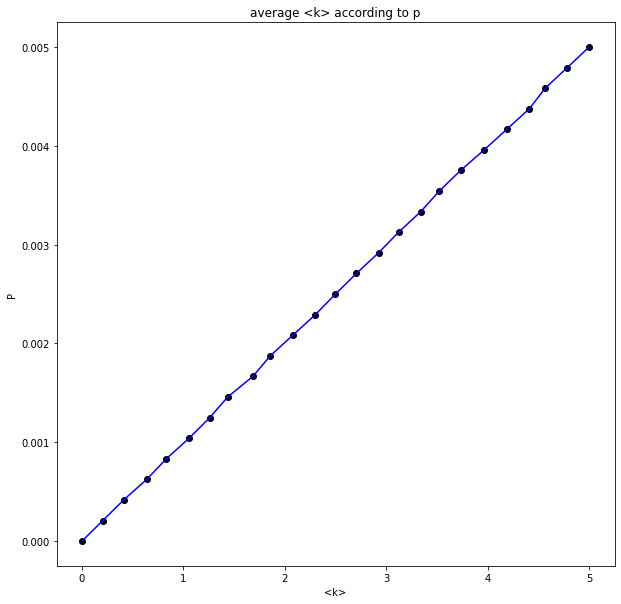

In [5]:
plt.plot( model_avg, space_values, color = 'b')
plt.scatter(model_avg, space_values, color = 'black')
plt.xlabel('<k>')
plt.ylabel('P')
plt.title('average <k> according to p')
plt.show()

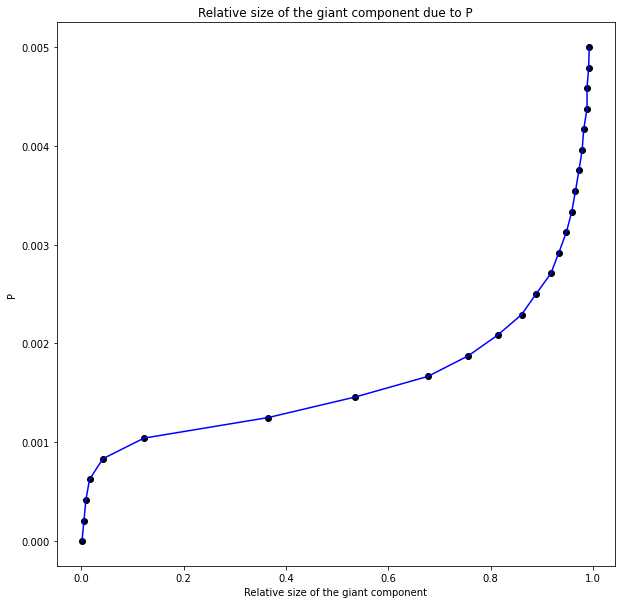

In [6]:
plt.plot( model_rel_size, space_values, color = 'b')
plt.scatter(model_rel_size, space_values, color = 'black')
plt.xlabel('Relative size of the giant component')
plt.ylabel('P')
plt.title('Relative size of the giant component due to P')
plt.show()

### Conclusion:
It seems that when it reachs p = .005 the giant component consist of all the nodes or almost all the nodes

### Task 3
In the Watts-Strogratz Model, there is range of rewiring probability values between p = 0.01 and p = 0.1 in the average shortest-path length is close to that of an equivalent random network; and at the same time, the clustering coefficient from the model is high. Nevertheless, the model cannot generate hubs. Fig. 2 presents the average path length and the clustering coefficient as a function of the rewiring probability. Observe that the x-axis is in a logarithmic scale.


<img src="Plot2.png" width="360"> </img>

<center> Fig. 2</center>


Reproduce a similar plot, by calculating:
* the average shortest path ($\langle l \rangle$)
* and the average clustering coefficient ($C$)

for Watts–Strogatz networks constructed for different values of the rewiring probability p. Take 20 equally spaced values of p between 0 and 1. For each value of p, build 20 different networks and compute the average shortest path and average clustering coefficient. To plot the two curves on a common y-axis, you can normalize the values by dividing them by the corresponding values for the probability p = 0.

In [7]:
p_values = np.linspace(0,1,20)

watts_avg = []
watts_cc = []

for p in p_values:
    
    avg_sum = 0
    
    cc_sum = 0
    
    for _ in range(20):
        
        model = nx.generators.random_graphs.watts_strogatz_graph(p = p, n = 1000, k = 4)
        
        avg_model = nx.algorithms.shortest_paths.generic.average_shortest_path_length(model)
        
        cc_model = nx.algorithms.cluster.average_clustering(model)
        
        avg_sum += avg_model
        
        cc_sum += cc_model
        
    watts_avg.append(avg_sum/20)
    watts_cc.append(cc_sum/20)
        

In [8]:
#transforming into a numpy array to then normalize by dividing by average path length and cluster coefficient of p= 0
watts_avg = np.array(watts_avg)/watts_avg[0]
watts_cc = np.array(watts_cc)/watts_cc[0]

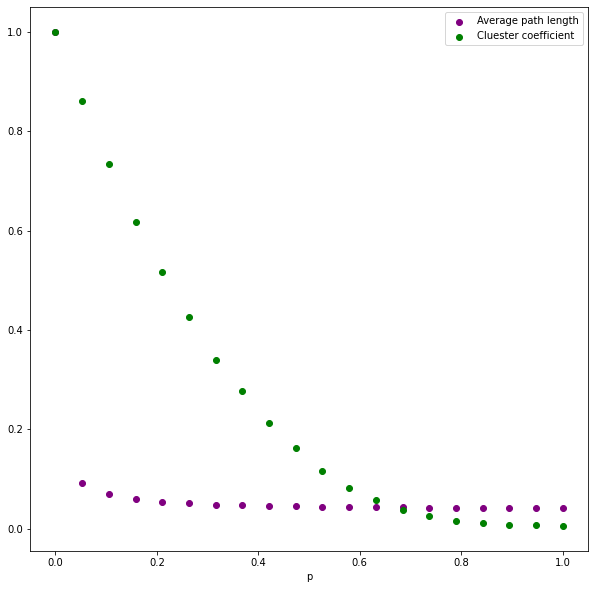

In [9]:
plt.scatter(p_values, watts_avg, color = 'purple', label = 'Average path length')
plt.scatter(p_values, watts_cc, color = 'green', label = 'Cluester coefficient')
plt.legend()
plt.xlabel('p')
plt.show()

## B. Identification of Network Models [40 pts]

### Task 4
Analyze each of the 4 Networks and determine which of the three models was used to generate them:
* model1.csv
* model2.csv
* model3.csv
* model4.csv

Justify your selection in each case.

## Model 1

In [10]:
# Analysis of model1.csv (10 pts)
csv = pd.read_csv('model1.csv', header = None)
model1 = nx.DiGraph(csv.values)

In [11]:
np.sum(np.array(csv.values), axis = 1)

array([2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 3., 2., 2.,
       2., 2., 3., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 3., 2., 2., 2., 2., 2., 2., 1., 2., 2., 3., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 4., 3., 2., 2.])

In [12]:
values1 = [dgr[1] for dgr in model1.in_degree()]
Counter(values1)

Counter({2: 83, 1: 9, 3: 7, 4: 1})

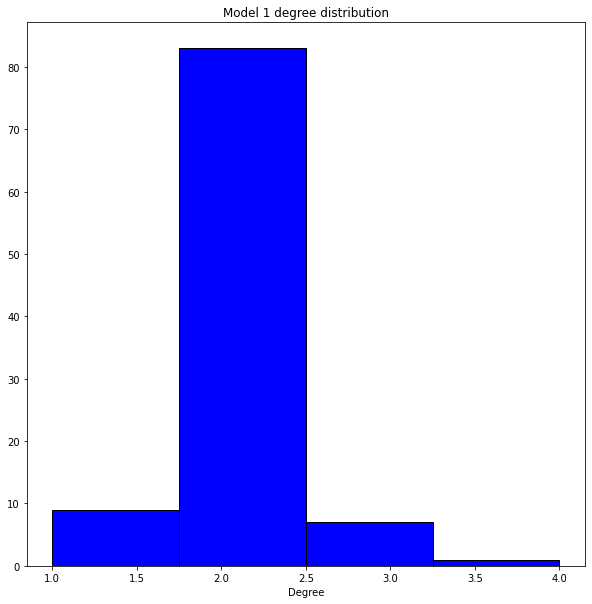

In [13]:
plt.hist(values1, bins = 4, color = 'blue', edgecolor = 'black')
plt.xlabel('Degree')
plt.title('Model 1 degree distribution')
plt.show()

### Answer:
It cannot be a Watt-Strogatz model because the nodes do not have the same number of neihgbors. Therefore, discarding that, we need to choose between the random model and Barabási, and Albert.
We reached the conclusion that this network is made using the random model, since it might not be easy to see, but we believe it's a poisson distribution, a characteristic of random model when <k\> << N (something that occurs here). How do we know is a possion distribution? Simple, it has the poisson shape and also we remembered that in a poisson distribution, most nodes have the same number of links, and finally, we noticed that in random models generated with a really low p this tends to happen.

## Model 2

In [14]:
# Analysis of model2.csv (10 pts)
csv = pd.read_csv('model2.csv', header = None)
model2 = nx.DiGraph(csv.values)

In [15]:
values2 = [dgr[1] for dgr in model2.in_degree()]
Counter(values2)

Counter({10: 4,
         18: 5,
         13: 11,
         8: 3,
         22: 1,
         14: 12,
         11: 6,
         15: 18,
         19: 6,
         12: 12,
         16: 6,
         17: 3,
         21: 5,
         9: 2,
         25: 1,
         20: 5})

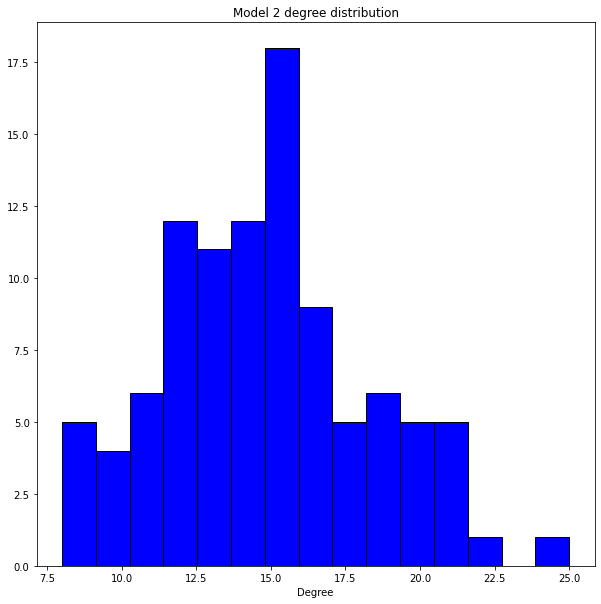

In [16]:
plt.hist(values2, bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Degree')
plt.title('Model 2 degree distribution')
plt.show()

### Answer:
We know it cannot be a Watt-Strogatz model since the nodes do not have the same number of neighbors. Now we have to decide among the random model and Barabási, and Albert.
We concluded this model was made using the random model because as you can notice the distribution of the degree is binomial, and the random model follows said distribution.

## Model 3

In [17]:
# Analysis of model3.csv (10 pts)
csv = pd.read_csv('model3.csv', header = None)
model3 = nx.DiGraph(csv.values)

In [18]:
values3 = [dgr[1] for dgr in model3.in_degree()]
Counter(values3)

Counter({13: 4,
         15: 6,
         17: 8,
         8: 1,
         14: 5,
         16: 4,
         18: 4,
         12: 3,
         20: 2,
         19: 2,
         11: 1,
         59: 1,
         58: 1,
         57: 1,
         55: 1,
         54: 2,
         52: 2,
         51: 1,
         49: 2,
         48: 1,
         46: 1,
         45: 2,
         43: 2,
         42: 1,
         41: 1,
         40: 1})

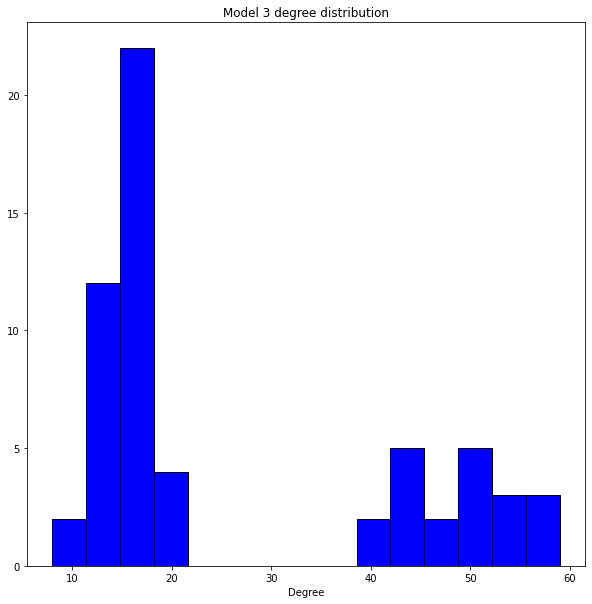

In [19]:
plt.hist(values3, bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Degree')
plt.title('Model 3 degree distribution')
plt.show()

### Answer:
By discarding it cannot be a Watt-Strogatz model since the nodes do not have the same number of neighbors.
We concluded is a Barabási, and Albert model because it has a characteristic that a random model does not have and is the Hubs. A hub is basically a node that has a really high degree, and as you can notice in this network there are a few nodes that are hubs and also another characteristic that helped us to conclude is a Barabási, and Albert model is that in Power Law, besides the rule of few hubs there is also the rule of many nodes with few links, something you can see at the beginning of the distribution chart. Furthermore, hubs are forbidden in random models so it is imposible for this network to be a random model.

## Model 4

In [20]:
# Analysis of model4.csv (10 pts)
csv = pd.read_csv('model4.csv', header = None)
model4 = nx.DiGraph(csv.values)

In [21]:
values4 = [dgr[1] for dgr in model4.in_degree()]
Counter(values4)

Counter({2: 100})

#### Answer:
The model is the Watt-Strogatz model, and the reason is quite simple is because this model meets the requirement of Watt-Strogatz and is that all the nodes have to have the same number of neighbors, something that does not happen in the other models, and as you can see in the Counter all the one hundred nodes have 2 neighbors.

## References
[1] F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science.